# VNA-like Calibration Techniques for FMCW Radars <img style="float: right; width: 160px" src="../images/logo-2pi-labs.png">
--- 
<img style="float: right; height: 50px; padding-right: 15px" src="../images/cc-by-nc-sa.eu.png">

**Author**: Jan Barowski, Simon Kueppers, 2pi-Labs GmbH \
**License**: Creative Commons [CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) 

<img src="../images/cal-setup-comparison.jpg" width="100%">


## Literature

[1] Kissinger, D. (2012). Radar Fundamentals. In: Millimeter-Wave Receiver Concepts for 77 GHz Automotive Radar in Silicon-Germanium Technology. SpringerBriefs in Electrical and Computer Engineering. Springer, Boston, MA.

[2] Hauschild, T., & Knochel, R. (1998). Calibration of short range FMCW-radars with network analyzer calibration techniques. In 1998 IEEE MTT-S International Microwave Symposium Digest (Cat. No. 98CH36192) (Vol. 2, pp. 969-972). IEEE.

[3] Barowski, J., Zimmermanns, M., & Rolfes, I. (2018). Millimeter-wave characterization of dielectric materials using calibrated FMCW transceivers. IEEE Transactions on Microwave Theory and Techniques, 66(8), 3683-3689.

[4] Hiebel, M. (2007). Fundamentals of Vector Network Analysis. Germany: Rohde & Schwarz.

[5] Jaeschke, T., Kueppers, S., Pohl, N., & Barowski, J. (2022, January). Calibrated and Frequency Traceable D-Band FMCW Radar for VNA-like S-Parameter Measurements. In 2022 IEEE Radio and Wireless Symposium (RWS) (pp. 64-67). IEEE.

[6] Kueppers, S., Jaeschke, T., Pohl, N., & Barowski, J. (2021). Versatile 126–182 GHz UWB D-Band FMCW Radar for Industrial and Scientific Applications. IEEE Sensors Letters, 6(1), 1-4.

## Viewing the FMCW Principle from a System-Theoretic Perspective
An FMCW radar sensor can be described very similar to a 1-port VNA. We have a transmit path (TX) sending out a known transmit signal $x(t)$ and a receive path (RX) which collects the receive signal $y(t)$. The relation between the RX signal $y(t)$ and the TX signal $x(t)$ is determined by the impulse response $h(t)$ of the given propagation environment, assuming a linear time-invariant system we can convolute the TX signal and the channel to calculate the Rx signal:
\begin{equation}
y(t) = x(t) * h(t) \tag{1}
\end{equation}
As the radar measurement aims at determining the properties of the propagation environment, $h(t)$ - or its spectral representation $H(j\omega)$ - has to be extracted from the TX and RX signals. This can be done, for example, by a deconvolution approach (OFDM radar) or by sending out very short pulses that are close to a Dirac-Delta-pulse so that $y(t)$ is very similar to $h(t)$. 

However, in FMCW radar systems [1], the mixer in the RX path already performs the majority of deconvolving the TX signal $x(t)$, which is here assumed to be a linearly frequency modulated chirp sequence. Thus, we can describe the TX signal $x(t)$ by its start (angular) frequency $\omega_0$, the (angular) sweep bandwidth $\Omega$, as well as the sweep duration $T$, assuming an arbitrary amplitude $A$. First we use a general representation using the instantanouos phase $\phi(t)$
\begin{equation}
x(t) = A \cdot \mathrm{cos}(\phi(t)) \tag{2}
\end{equation}
The instantanous phase $\phi(t)$ is calculated from the aforementioned sweep parameters, neglecting an offset phase
\begin{equation}
\phi(t) = \int_0^{t'} \omega_0 + \frac{\Omega t'}{T} dt' = \omega_0 t + \frac{\Omega t^2}{2T} \tag{3}
\end{equation}
The TX signal is therefore given by
\begin{equation}
x(t) = A \cdot \mathrm{cos}(\omega_0 t + \frac{\Omega t^2}{2T}) \tag{4}
\end{equation}

Assuming a very simple propagation channel with a single reflection at a distance of $R$ that introduces a delay of $\tau=\frac{2R}{c_0}$ and magnitude $B$ we can state
\begin{equation}
h(t) = B \cdot \delta(t-\tau) \tag{5}
\end{equation}

Thus, the RX signal is a scaled and time-shifted version of $x(t)$
\begin{equation}
y(t) = B \cdot x(t-\tau) = AB\cdot\mathrm{cos}(\omega_0 (t-\tau) + \frac{\Omega (t-\tau)^2}{2T}) \tag{6}
\end{equation}

\begin{equation}
y(t) = AB\cdot\mathrm{cos}(\omega_0 t- \omega_0 \tau + \frac{\Omega}{2T}(t^2-2t\tau+\tau^2)) \tag{7}
\end{equation}

The trick in FMCW now is the quasi-homodyne downconversion in the RX mixer that multiplies the RX and the TX signal. By downconverting the signal, we calculate the difference of the cosine-arguments and remove all RF components. This gives the intermediate- (IF-) or beat-signal $s(t)$

\begin{equation}
s(t) = \overline{x(t)y(t)} = AB\cdot\mathrm{cos}(\omega_0 \tau + \frac{\Omega\tau t }{T} - \frac{\tau^2\Omega}{2T}) = AB\cdot\mathrm{cos}( (\omega_0 + \frac{\Omega t }{T})\tau - \frac{\tau^2\Omega}{2T}) \tag{8}
\end{equation}

The second part of the argument above $\frac{\tau^2\Omega}{2T}$ is usually neglected since $\tau^2 << T$. Problems may arise in ultrawideband sweep or very short sweep times, i.e. extremely large frequency gradients. The simplified IF-signal therefore is

\begin{equation}
s(t) =  AB\cdot\mathrm{cos}( (\omega_0 + \frac{\Omega t }{T})\tau) \tag{9}
\end{equation}

Remembering the system-theoretic approach one can now see that this is equal to the real part of the measured transfer function of the propagation environment, if we utilize the instantaneous transmit frequency during the FMCW-sweep
\begin{equation}
\omega(t) =  \omega_0 + \frac{\Omega t }{T} \tag{10}
\end{equation}

\begin{equation}
s(t) =  AB\cdot\mathrm{cos}( \omega(t) \tau) = A\cdot real\{H(j\omega(t))\} \tag{11}
\end{equation}

So finally, we can see that we can utilize the linear frequency-time-dependence $\omega = f(t)$ to interprete the IF-signal not as a time-dependend ADC signal, but instead as a frequency-domain $\text{S}_{\text{11}}$ representation (assuming a monostatic, i.e. 1-port radar sensor) of the propagation environment. Therefore, each sample of the IF-signal corresponds to the real part of the measured $\text{S}_{\text{11}}$ parameter at this instantanous frequency [2][3]. 

Usually we are interested in the time-domain representation of this $\text{S}_{\text{11}}$ parameter. It corresponds to the impulse response of the propagation environment (eq.&nbsp;5) and is often referred to as the *radar echo profile*. Therefore we calculate the fast Fourier Transform (FFT) of the IF-signal, i.e. of $\text{S}_{\text{11}}$. Afterwards we just have to ensure the correct range-axis scaling to properly measure distance. From the frequency-domain point of view, it is quite simple to tell how to calculate this axis: The range axis $R$ is equal to the scaled delay $\tau$ axis, assuming a constant spead of light ($c_0$). The unambigous-range of the delay axis after the FFT determined by the step-size in frequency domain. This is a general principle in Fourier transform: the sampling rate in the original domain relates to the unambigous (i.e. covered) range in the transformed domain.
\begin{equation}
\tau_\mathrm{max} = \frac{1}{\Delta f} \, \mathrm{thus} \; R_\mathrm{max} = \frac{c_0}{2 \Delta f}\tag{12}
\end{equation}

In the following we generate very simple FMCW signals to demonstrate these principles.

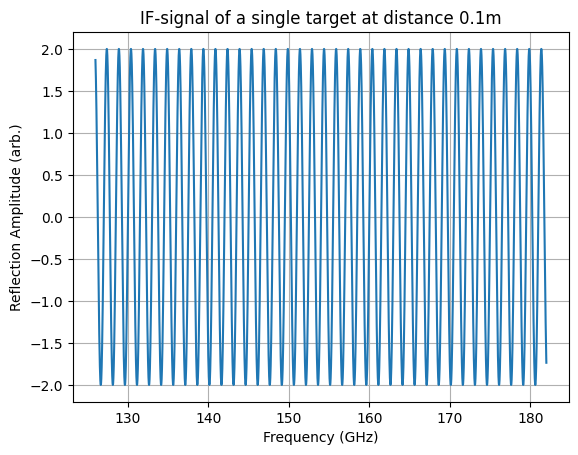

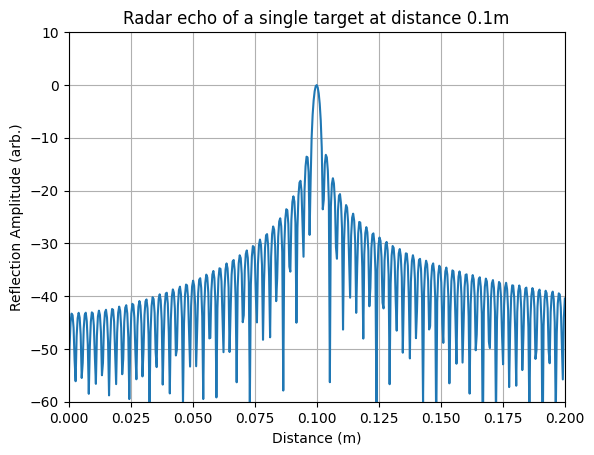

In [1]:
import numpy as np
import scipy.constants as consts
import matplotlib.pyplot as plt

# Set the covered frequency range of the FMCW sweep (eq. 10) and other information
f0 = 126e9     # Start frequency in Hz
omega = 56e9   # Bandwidth in Hz
R = 0.1        # Target distance in m
NFFT = 8192*4  # Number of FFT points

# Define the signal model in frequency domain (IF-signal)
frequency = f0 + np.linspace(0, omega, 5001) # Frequency vector
tau = 2*R / consts.c # propagation time delay of receive signal as a result of the target distance

# frequency domain model of IF signal based on the frequency domain representation of (5)
H = 1 * np.exp(1j * 2 * np.pi * frequency * tau) # IF Signal based on the frequency domain representation of (eq. 5)
if_signal = np.real(H) * 2 # real part only (eq. 11), as we do not use an IQ-receiver here


# Transform signal model into time-domain (radar echo) using IFF since we interprete
# this as a transform from frequency- to time-domain.
if_signal_spectrum = np.fft.ifft(if_signal, NFFT) * NFFT / len(if_signal)
tau_max = 1/np.abs(frequency[1] - frequency[0])  # Unambigous range of time delay axis (eq. 12)
R_max = consts.c / 2 * tau_max                   # Scaled unambigous range of range-axis (eq. 12)
range_axis = np.arange(NFFT) / NFFT * R_max      # Calculate range axis of radar echo (12)

# Plot IF-signal (IF-domain = sweep-domain = frequency-domain interpretation)
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(frequency/1e9, if_signal)
ax.set_xlabel('Frequency (GHz)')
ax.set_ylabel('Reflection Amplitude (arb.)')
ax.grid(True)
ax.set_title('IF-signal of a single target at distance {}m'.format(R));

# Plot spectrum of IF-signal (echo-domain = range profile = fasttime-domain interpretation)
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(range_axis, 20*np.log10(np.abs(if_signal_spectrum)))
ax.set_xlim((0,2*R))
ax.set_ylim((-60,10))
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Reflection Amplitude (arb.)')
ax.grid(True)
ax.set_title('Radar echo of a single target at distance {}m'.format(R));


## One-Port Calibration of a classic VNA
As we have seen above, we can think of the intermediate-(IF-)signal of the FMCW sensor as the real part of a measured scattering-parameter, e.g. $\text{S}_{\text{11}}$ when using a monostatic sensor [3]. Due to arbitrary power levels, changing output power, and the absence of a reference signal, the sensor has to be calibrated, if quantitatively correct measurement results are to be obtained. Therefore reference measurements on known targets are needed. 

Luckily, vector network analysis methods can be applied very well here, since we found a frequency domain description of the measurement system above. We can thus model our sensor using an ideal sensor that measures perfectly correct and an error two-port network that accounts for all linear impairments at each frequency point [4]. During the calibration, we can identify the relevant parameters of this error model and perform a de-embedding afterwards.

Let $\tilde{S}_{11}$ be the measured (error-prone) S-parameter of the sensor. Then we can relate it to the true $S_{11}$ of the device under test (DUT) by using the 4 S-parameters of our error-model $e_{11},e_{21},e_{12},e_{22}$.
\begin{equation}
\tilde{S}_{11} = e_{11} + \frac{e_{21} e_{12} S_{11}}{1-e_{22}S_{11}} \tag{13}
\end{equation}
We can now bring in three known targets to calculate all $e_{xy}$. Using a linear equation system, three arbitrary (but different) $S_{11,i}$ can be used. However, for a closed-form solution, it is convenient to have three widely used standards: Match (M) $S_{11,M} = 0$, Short (S) $S_{11,S} = -1$, and Open (O) $S_{11,O} = 1$. The open standard can be realized using a shifted (shim-) short measurement, which is often used in free-space or guided wave setups.

We can see that $S_{11,M} = 0$ directly provides $e_{11}$:
\begin{equation}
e_{11} = \tilde{S}_{11,M} \tag{14}
\end{equation}
By removing the additive error from the error-port mismatch $e_{11}$ one can calculate the remaining errors:
\begin{equation}
e_{22} = \frac{\tilde{S}_{11,S} + \tilde{S}_{11,O} - 2e_{11}}{\tilde{S}_{11,O}-\tilde{S}_{11,S}} \tag{15}
\end{equation}
It has to be done that only the bidirectional transmission error can be calculated and compensated for, since only a 1-port setup is considered. Therefore only the product $e_{21} e_{12}$ can be calculated:
\begin{equation}
e_{21}e_{12} = -2\frac{(\tilde{S}_{11,O}-e_{11})(\tilde{S}_{11,S}-e_{11})}{\tilde{S}_{11,O}-\tilde{S}_{11,S}} \tag{16}
\end{equation}

Using the now known bidirectional transmission error $e_{21}e_{12}$ as well as the mismatches to each side $e_{11}$ and $e_{22}$ and the error-impaired measurement $\tilde{S}_{11}$, one can calculate the true reflection factor of the device under test:
\begin{equation}
S_{11} = \frac{\tilde{S}_{11} - e_{11}}{e_{21}e_{12} + e_{22}(\tilde{S}_{11}-e_{11})}  \tag{17}
\end{equation}

Lets us now put these equations to the test using simplified example networks.

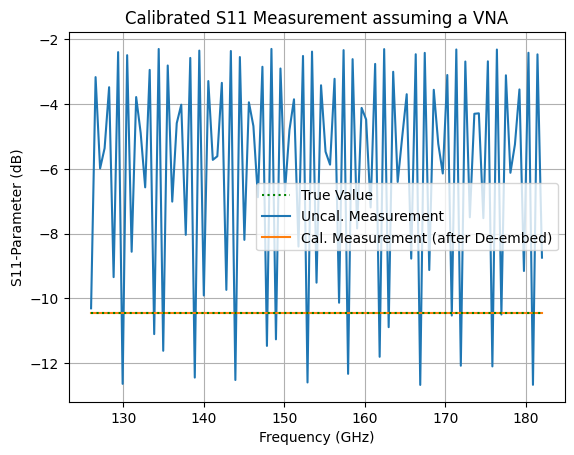

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import c as c0

N = 101 # Number of frequency samples
frequency = np.linspace(126e9, 182e9, N) # Frequency vector

# ideal device under test (1-port)
S_open  =     np.ones((1, 1, N))
S_short =    -np.ones((1, 1, N))
S_match =    np.zeros((1, 1, N))
S_dut = 0.3 * np.ones((1, 1, N))

# generate error 2-port
E = np.ones((2, 2, N), dtype=complex)
E[0,0,:] = -0.5 # e11 mismatch port 1
E[1,1,:] = -0.4 # e22 mismatch port 2
E[0,1,:] = np.exp(1j * 2 * np.pi * frequency / c0 * 0.1) # e12 delay line -> phase shift
E[1,0,:] = np.exp(1j * 2 * np.pi * frequency / c0 * 0.2) # e21 delay line -> phase shift

# generate measurement (1-port data), apply eq. 13 on each measurement object
S_measure_open  = np.ones((1, 1, N), dtype=complex)
S_measure_short = np.ones((1, 1, N), dtype=complex)
S_measure_match = np.ones((1, 1, N), dtype=complex)
S_measure_dut   = np.ones((1, 1, N), dtype=complex)

S_measure_open [0,0,:] = E[0,0,:] + (E[0,1,:] * E[1,0,:] * S_open[ 0,0,:]) / (1-E[1,1,:] * S_open [0,0,:])
S_measure_short[0,0,:] = E[0,0,:] + (E[0,1,:] * E[1,0,:] * S_short[0,0,:]) / (1-E[1,1,:] * S_short[0,0,:])
S_measure_match[0,0,:] = E[0,0,:] + (E[0,1,:] * E[1,0,:] * S_match[0,0,:]) / (1-E[1,1,:] * S_match[0,0,:])
S_measure_dut  [0,0,:] = E[0,0,:] + (E[0,1,:] * E[1,0,:] * S_dut[  0,0,:]) / (1-E[1,1,:] * S_dut  [0,0,:])

# identify error 2-port, apply eqs. 14-16
E_estimate = np.ones((2, 2, N), dtype=complex)

E_estimate[0,0,:] = S_measure_match[0,0,:]
E_estimate[1,1,:] = (S_measure_short[0,0,:] +  S_measure_open[0,0,:] - 2*E_estimate[0,0,:]) / (S_measure_open[0,0,:] - S_measure_short[0,0,:])
E_estimate[1,0,:] = -2*(S_measure_open[0,0,:] - E_estimate[0,0,:]) * (S_measure_short[0,0,:]-E_estimate[0,0,:]) / (S_measure_open[0,0,:]-S_measure_short[0,0,:])

# correct measured value / de-embedding, apply eq. 17
S_dut_calibrated = np.ones((1, 1, N), dtype=complex)
S_dut_calibrated[0,0,:] = (S_measure_dut[0,0,:] - E_estimate[0,0,:]) / (E_estimate[1,0,:] + E_estimate[1,1,:] * (S_measure_dut[0,0,:] - E_estimate[0,0,:]))

# demonstrate results
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(frequency/1e9, 20*np.log10(np.abs(S_dut[0,0,:])),'g:', label='True Value', zorder=10)
ax.plot(frequency/1e9, 20*np.log10(np.abs(S_measure_dut[0,0,:])), label='Uncal. Measurement')
ax.plot(frequency/1e9, 20*np.log10(np.abs(S_dut_calibrated[0,0,:])), label='Cal. Measurement (after De-embed)')
ax.set_xlabel('Frequency (GHz)')
ax.set_ylabel('S11-Parameter (dB)')
ax.grid(True)
ax.set_title('Calibrated S11 Measurement assuming a VNA')
ax.legend();

## One-Port Calibration using a Ultra-Wideband FMCW Radar Sensor

As we have seen previously, the IF-signal of an FMCW radar can be considered as the real part of a 1-port VNA measurement on an arbitrary DUT [5]. Therefore, we can apply the same model as in the VNA section but we have to consider that in case of the 2πSENSE X1000 sensor [6], only the real part of the reflection factor is measured by the hardware. Let's remember eq. 11.

\begin{equation}
s(t) =  AB\cdot\mathrm{cos}( \omega(t) \tau) = A\cdot real\{H(j\omega(t))\} \tag{11}.
\end{equation}

Therefore, we can straightforwardly use the same set of equations, if we calculate the complex analytic signal to each IF-signal beforehand. Calculating the complex analytic signal can be realized using a Hilbert-Transform on each radar measurement.

\begin{equation}
\underline{s}(t) =  Hilbert\{s(t)\} = H(j\omega(t)) \tag{18}
\end{equation}

As seen in eq. 14, a Match measurement provides $e_{11}$. A match can most easily be realized by radiating into empty space, ensuring that there are no nearby targets. Secondly, a Short measurement can be realized by measuring onto a metal plate (assumed reflection factor of -1). One has to ensure that the target is large enough to prevent edge effects. We can furthermore simplify the calibration, assuming that the mismatch of the error 2-port on the DUT side (port 2) $e_{22}$ is small. If we apply this, no Open calibration measurement is needed. Thus, eq. 13 simplifies to 

\begin{equation}
\tilde{S}_{11} = e_{11} + e_{21} e_{12} S_{11}. \tag{19}
\end{equation}

The transmission error can therefore directly be derived from the Short measurement alone

\begin{equation}
e_{21} e_{12} = \frac{ \tilde{S}_{11,S} - e_{11} }{S_{11}}. \tag{20}
\end{equation}

Under this assumption, the de-embedding, i.e. the correction of the measurement can be done via

\begin{equation}
S_{11} = \frac{\tilde{S}_{11} - e_{11}}{e_{21}e_{12} }  \tag{21}
\end{equation}

We will now try to put these ideas into reality by using measurement data from a 2πSENSE X1000 sensor connected to a Swiss*to*12 MCK Material Characterization Kit as seen on the Photograph at the beginning of this document. Note that we introduce a timegating helper function to improve the measurement quality by isolating the frequency response of the *Material-Under-Test* removing parasitic components such as multiple reflections, for example.

In [3]:
from scipy.constants import c as c0
import numpy as np

# Helper function for timegating a frequency domain signal by Transforming-Gating-Transforming
def timegate(frequency, S, gate):
    # unambigous range of time delay axis eq. (12)
    taumax = 1/np.abs(frequency[1]-frequency[0])

    # scaled unambigous range of range-axis eq. (12)
    Rmax = c0 / 2 * taumax

    # calculate range axis of radar echo eq. (12)
    distance = np.arange(len(S))/len(S) * Rmax

    # transform to echo domain    
    spectrum = np.fft.ifft(S)

    # identify spectral samples outside the given region of interest
    v = np.bitwise_or(distance<gate[0],distance>gate[1])
    v = np.bitwise_and(v,np.flipud(v))

    # set these samples to zero
    spectrum[v] = 0

    # return signal in original domain
    return np.fft.fft(spectrum)
    
# helper function for Hilbert-transformation to obtain the corresponding analytic signal to a given real-valued signal
# performs Hilbert transformation by removing the negative-frequency half of the spectrum 
def hilbert(signal):
    # calculate signal spectrum and force the right hand side half 
    # (or all negative frequency components) to zero
    spectrum = np.fft.ifft(signal)
    spectrum[len(spectrum)//2:] = 0

    # return signal in original domain
    return np.fft.fft(spectrum)

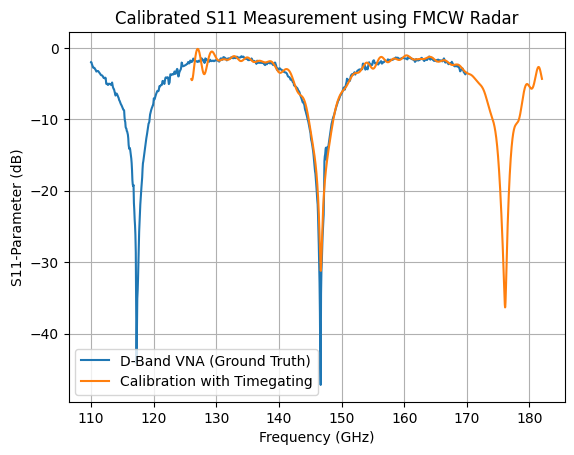

In [4]:
from twopilabs.sense.x1000 import SenseX1000
import h5py
import scipy.io as io
import matplotlib.pyplot as plt

# open hdf5 file containing recordered data
filename = "../data/cal-data-silicon-wafer-1500um-x1000.hdf5"
file = h5py.File(filename,'r')

data_match = SenseX1000.AcqData.from_hdf5(file,name="match")
data_short = SenseX1000.AcqData.from_hdf5(file,name="short")
data_dut   = SenseX1000.AcqData.from_hdf5(file,name="dut")

# calculate hilbert transform of all measured signals
ramp_match = hilbert(data_match.array[0, 0, :])
ramp_short = hilbert(data_short.array[0, 0, :])
ramp_dut   = hilbert(data_dut.array  [0, 0, :])

# port 1 mismatch of error twoport resembles match measurement (eq. 14)
E11 = ramp_match

# calculate transmission error through error 2-port assuming e22 = 0, cf. eq. 13 and eq. 16
# we do this simplifying assumption here, since an "open" standard is hard to realize at D-band, leading to eq. 20
E12E21 = -(ramp_short - E11)

# de-embed dut (eq. 17), assuming e22=0, leading to eq. 21
dut_calibrated = -(ramp_dut - E11)/E12E21

# additionally timegate the calibrated signal to improve quality
dut_calibrated_timegated = timegate(data_dut.header.freq_axis, dut_calibrated, (0,0.075))

# for reference show results and compare them to VNA
dut_vna = io.loadmat("../data/cal-data-silicon-wafer-1500um-vna.mat")

# plot the magnitude to show the results
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(dut_vna["frequency"][0,:]/1e9, 20*np.log10(np.abs(dut_vna["S"][:,0])), label='D-Band VNA (Ground Truth)')
ax.plot(data_dut.header.freq_axis/1e9, 20*np.log10(np.abs(dut_calibrated_timegated)), label='Calibration with Timegating')
ax.set_xlabel('Frequency (GHz)')
ax.set_ylabel('S11-Parameter (dB)')
ax.grid(True)
ax.set_title('Calibrated S11 Measurement using FMCW Radar')
ax.legend();